# Exercise 3.2: Tree Maps, Area Charts, and Stacked Area Charts: R
Michael Hotaling

In [1]:
library(ggplot2)
library(treemapify)
library(formattable)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'treemapify' was built under R version 3.6.3"Warning message:
"package 'formattable' was built under R version 3.6.3"

# Tree map

In [2]:
df <- read.delim("expenditures.txt")
head(df)

year,category,expenditure,sex
2008,Food,6443,1
2008,Alcoholic Beverages,444,1
2008,Housing,17109,1
2008,Apparel,1801,1
2008,Transportation,8604,1
2008,Healthcare,2976,1


In [3]:
df$money <- currency(df$expenditure, digits = 0)

df$labels <- paste0(df$category,":\n",df$money, sep = "")

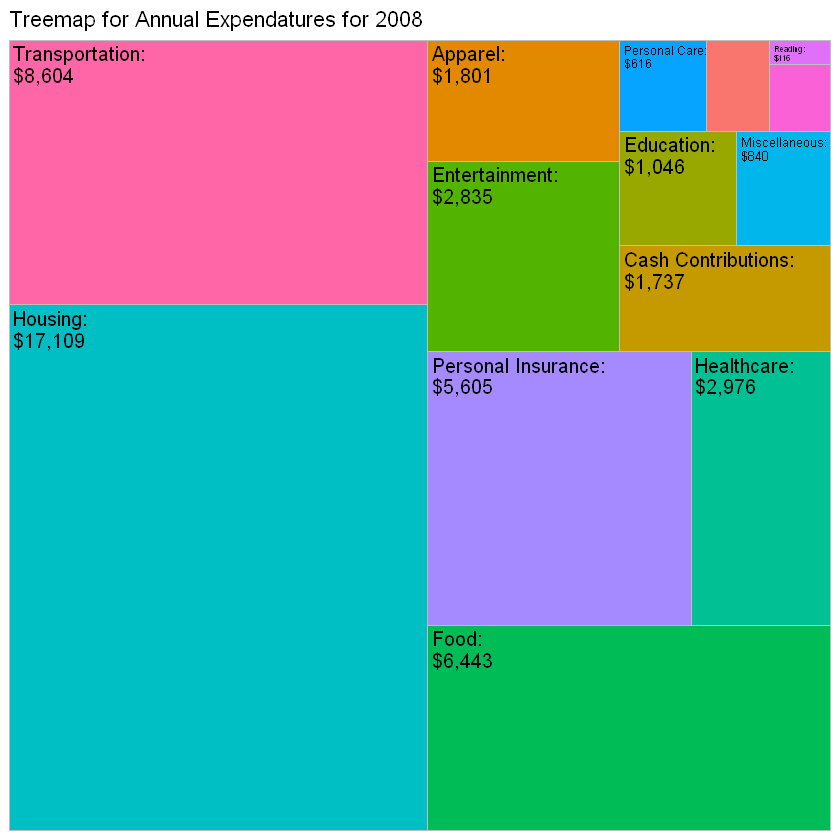

In [4]:
df <- subset(df, year == 2008)

ggplot(data = df, aes(area = expenditure, 
                      label = labels, 
                      fill = category,
                subgroup = labels)) +
geom_treemap() +  
geom_treemap_subgroup_text(place = "topleft", alpha = 1, colour = "black", size = 12) + 
ggtitle("Treemap for Annual Expendatures for 2008") + 
theme(legend.position = "none")

# Area Chart

In [5]:
df <- read.csv("unemployement-rate-1948-2010.csv")
head(df)

Series.id,Year,Period,Value
LNS14000000,1948,M01,3.4
LNS14000000,1948,M02,3.8
LNS14000000,1948,M03,4.0
LNS14000000,1948,M04,3.9
LNS14000000,1948,M05,3.5
LNS14000000,1948,M06,3.6


In [6]:
df$Period <- as.numeric(sub("M", "", df$Period))
df$Date <- df$Year + df$Period / 12
df$Percentage <- df$Value / 100

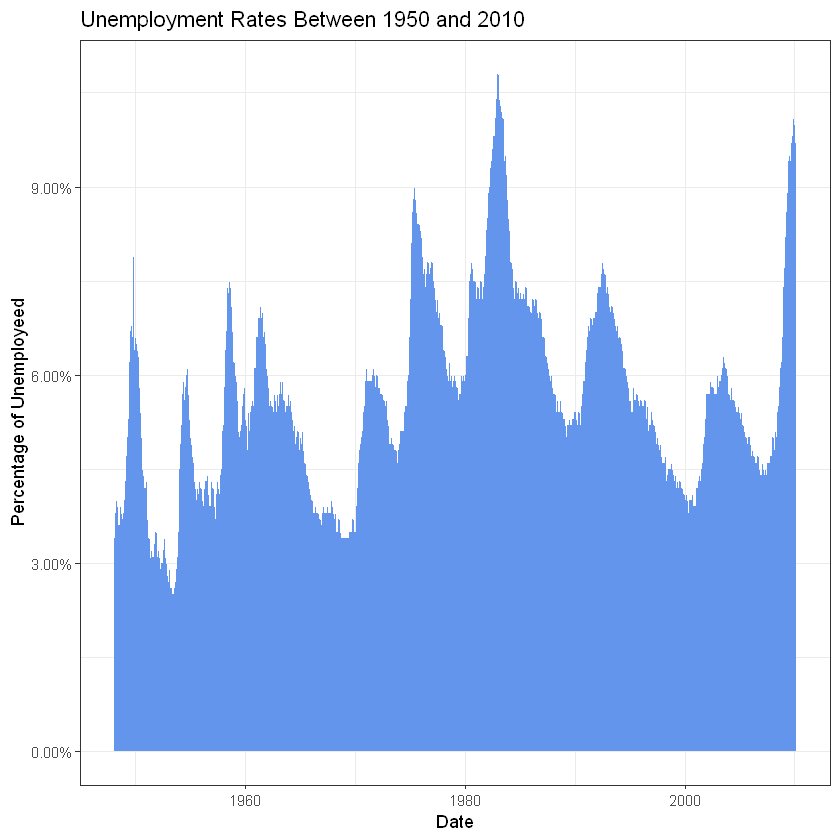

In [7]:
ggplot(data = df, aes(x = Date, y = Percentage)) + 
geom_area(fill = "cornflowerblue") + 
theme_bw() + 
ggtitle("Unemployment Rates Between 1950 and 2010") + 
scale_y_continuous(labels = scales::percent) +
ylab("Percentage of Unemployeed")  

# Stacked Area Chart

In [8]:
df <- read.delim("expenditures.txt")
head(df)

year,category,expenditure,sex
2008,Food,6443,1
2008,Alcoholic Beverages,444,1
2008,Housing,17109,1
2008,Apparel,1801,1
2008,Transportation,8604,1
2008,Healthcare,2976,1


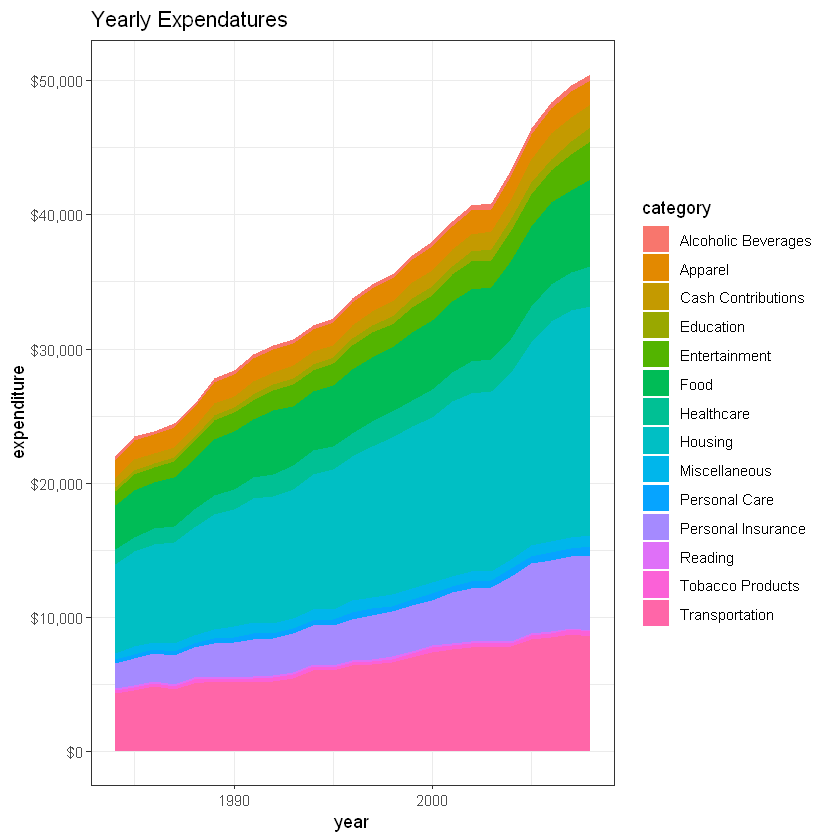

In [9]:
ggplot(data = df, aes(x=year, y=expenditure, fill=category)) + 
geom_area() + 
scale_y_continuous(labels=scales::dollar_format()) + 
ggtitle("Yearly Expendatures") + 
theme_bw()